In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)


## 1. Data Wrangling

In [3]:
data = pd.read_csv('./stocknews/combined_reddit_dj_2008_2020.csv')
data_copy=data.copy()
data.shape


(3078, 3)

In [4]:
print('We collected data from {} to {}'.format(data.Date.min(), data.Date.max()))

We collected data from 2008-02-07 to 2020-04-30


In [5]:
data.head(10)

,Date,Headlines,Label
0,2008-02-07,Australia released grisly surveillance picture...,Down
1,2008-02-08,"""They said when--not if--martial law is declar...",Up
2,2008-02-11,"U.S. bombing in Iraq massacring civilians, cre...",Down
3,2008-02-12,BBC cover Anonymous Scientology Protests!. Aus...,Down
4,2008-02-13,Gang-Rape Victim Says She and 38 Others Silenc...,Down
5,2008-02-14,Top Secret Photos from Iran. France's Sarkozy ...,Up
6,2008-02-15,"Israel’s army chief orders IDF land, sea and a...",Up
7,2008-02-19,Over Five Million Dead in Congo? How Truth is ...,Up
8,2008-02-20,The missile shoots... it scores! (The Spy Sate...,Down
9,2008-02-21,A US businesswoman fears for her life after Sa...,Up


In [5]:
#Detect whether there is miss value
data.isnull().sum()

Date         0
Headlines    0
Label        0
dtype: int64

In [6]:
data.Label.value_counts()

Down    1660
Up      1418
Name: Label, dtype: int64

## 2. Applying TF-IDF Vectorizer


In [6]:
#Before tf-idf, I clean the text
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}
import re
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'0,0', '00', text) 
    text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]]', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\$', ' $ ', text)
    text = re.sub(r'u s ', ' united states ', text)
    text = re.sub(r'u n ', ' united nations ', text)
    text = re.sub(r'u k ', ' united kingdom ', text)
    text = re.sub(r'j k ', ' jk ', text)
    text = re.sub(r' s ', ' ', text)
    text = re.sub(r' yr ', ' year ', text)
    text = re.sub(r' l g b t ', ' lgbt ', text)
    text = re.sub(r'0km ', '0 km ', text)
    text = re.sub(r'\[[0-9]*\]',' ',text)
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'\d',' ',text)
    
    return text
data['Headlines'] = data['Headlines'].apply(lambda x: clean_text(x))

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvec = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', min_df=0.05, max_df=0.95)
tfidf_df = pd.DataFrame(tfvec.fit_transform(data.Headlines).toarray(), columns=tfvec.get_feature_names())

In [8]:
data = pd.concat([data,tfidf_df],axis=1)

In [9]:
data.shape

(3078, 998)

In [10]:
data.head(3)

,Date,Headlines,Label,able,abortion,abuse,access,according,accounts,accused,...,wrong,year,year old,years,years ago,years prison,yemen,young,zealand,zimbabwe
0,2008-02-07,australia released grisly surveillance picture...,Down,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.092601,0.0,0.0,0.0,0.0,0.0,0.0
1,2008-02-08,they said when not if martial law is declared...,Up,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,2008-02-11,united states bombing in iraq massacring civi...,Down,0.0,0.0,0.0,0.119563,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Visualization of features in dataset

In [12]:
#Explore each labels's word character
up_headline = ' '.join(data[data.Label=='Up'].Headlines)
down_headline = ' '.join(data[data.Label=='Down'].Headlines)

from nltk.tokenize import word_tokenize
up_word = word_tokenize(up_headline)
down_word = word_tokenize(down_headline)

In [13]:
print('There are %d words in Up'%len(up_word),'\nThere are %d words in Down'%len(down_word))

There are 617238 words in Up 
There are 724990 words in Down


In [14]:
#Explore top frequent 50 words in each Label
from collections import Counter
up_count_50 = pd.DataFrame(Counter(up_word).most_common(50),columns=['Up_word','Up_count'])
down_count_50 = pd.DataFrame(Counter(down_word).most_common(50),columns=['Down_word','Down_count'])


In [15]:
pd.concat([up_count_50,down_count_50],axis=1)

,Up_word,Up_count,Down_word,Down_count
0,the,21017,the,24626
1,to,18543,to,22174
2,in,15445,of,18050
3,of,15262,in,18044
4,a,11011,a,12706
5,and,8505,and,10153
6,for,6868,for,7963
7,on,5488,on,6400
8,is,5269,is,6118
9,’,3528,’,4144


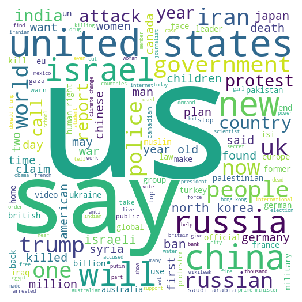

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 8).generate(up_headline) 
# plot the WordCloud image                        
#plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

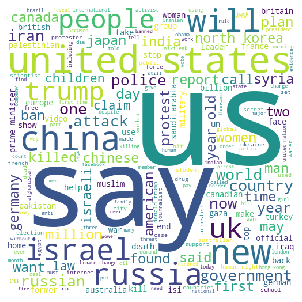

In [17]:
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 8).generate(down_headline) 
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## 4. Data Analysis

In [ ]:
data = data.drop(columns=['Date','Headlines'])

In [19]:
data.shape

(3078, 996)

In [ ]:
label = data.pop('Label')
data['Movement'] = label
data['Movement'] = data['Movement'].apply(lambda x: 0 if x=='Down' else 1)

In [24]:
data.head(2)

,able,abortion,abuse,access,according,accounts,accused,accuses,act,action,...,year,year old,years,years ago,years prison,yemen,young,zealand,zimbabwe,Movement
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.092601,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


In [27]:
x = data.loc[:,data.columns!='Movement']
y = data['Movement']

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('DdecisionTreeClassifier' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier()))

results = []
names = []

for name, model in models:
    clf = model
    scores = cross_val_score(clf, x, y, cv=5)
    print(name + "'s Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

LR's Accuracy: 0.50 (+/- 0.02)
LDA's Accuracy: 0.51 (+/- 0.03)
KNN's Accuracy: 0.51 (+/- 0.01)
DdecisionTreeClassifier's Accuracy: 0.49 (+/- 0.03)
NB's Accuracy: 0.49 (+/- 0.03)
SVM's Accuracy: 0.54 (+/- 0.00)
RF's Accuracy: 0.52 (+/- 0.03)


## Conclusion

Before analyzing words in headlines, I also analyzed sentiment per headline of each day.
Unfortunately, it seems it's impossible to find any relation between reddit world news headline and stock movement.
The results are always like random guess.